<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%920125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 値設定

maxbeta = 1.
minbeta = 0.1
folder_name = '相転移0125'
epoch = 10
batch_size = 32
split = 100

In [2]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'


folder = ['常磁性0125', '強磁性0125']

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]



X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2, shuffle=True)

print(len(X_train))
print(len(X_test))

1600
400


In [3]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [4]:
# 学習データで学習
# model.fit(X_train, Y_train, epochs=10, batch_size=64)
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Epoch 1/10
50/50 [==============================] - 111s 2s/step - loss: 0.6970 - accuracy: 0.4956
Epoch 2/10
50/50 [==============================] - 113s 2s/step - loss: 0.6837 - accuracy: 0.5225
Epoch 3/10
50/50 [==============================] - 109s 2s/step - loss: 0.6791 - accuracy: 0.5681
Epoch 4/10
50/50 [==============================] - 110s 2s/step - loss: 0.5533 - accuracy: 0.7494
Epoch 5/10
50/50 [==============================] - 113s 2s/step - loss: 0.3761 - accuracy: 0.9038
Epoch 6/10
50/50 [==============================] - 108s 2s/step - loss: 0.0236 - accuracy: 0.9962
Epoch 7/10
50/50 [==============================] - 109s 2s/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 113s 2s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 108s 2s/step - loss: 9.7448e-04 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 8s 607ms/step - loss: 6.1615e-04 - accuracy: 1.0000


In [9]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = [folder_name]

X_image = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

print(len(X_image))

2000


In [10]:
history = model.predict(X_image)

63/63 [==============================] - 47s 754ms/step


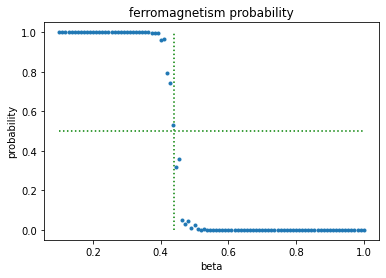

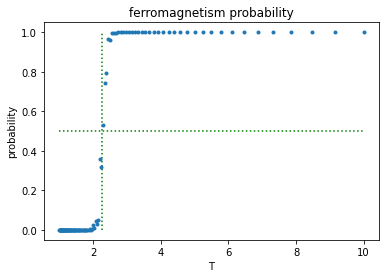

In [11]:
import matplotlib.pyplot as plt
from statistics import mean

# plt.plot(history)

predict = []

for i in range(len(history)):
  predict.append(history[i][1])


result = []

p = 0

for i in range(split):
  for j in range(20):
    p += predict[i*20+j]
  result.append(p / 20)
  p = 0

betas=np.linspace(minbeta, maxbeta, split).tolist()
T = list(map(lambda x: 1/x, betas))

# まずはbetaの値でやってみて、0.44かどうかをみる

# beta-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('beta')
plt.ylabel('probability')
plt.hlines(0.5, minbeta, maxbeta, color='g', linestyles='dotted')
plt.vlines(0.44, 0, 1, color='g', linestyles='dotted')
ax.errorbar(betas, result, capsize=4, marker='.', linestyle="")
plt.show()

# T-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('T')
plt.ylabel('probability')
plt.hlines(0.5, 1/maxbeta, 1/minbeta, color='g', linestyles='dotted')
plt.vlines(2.27, 0, 1, color='g', linestyles='dotted')
ax.errorbar(T, result, capsize=4, marker='.', linestyle="")
plt.show()